## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [40]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [41]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [42]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [43]:
df[df.converted==1].user_id.count()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [44]:
#New page and treatment are the criteria we should have
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].user_id.count() + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].user_id.count()

3893

f. Do any of the rows have missing values?

In [45]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [46]:
df2 = df.query('group == "control" & landing_page == "old_page" | group == "treatment" & landing_page == "new_page"')

In [47]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [48]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [49]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

For user_id 773192, the group is treatment, the landing_page is new_page, and the converted value is 0.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [50]:
# Dropping duplicates based on index
df2.drop(labels=1899, axis=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
df2.user_id.nunique()

290584

In [52]:
#Validating the dropped values
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
(df2['converted'] == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
control_mean = (df2.query('group == "control"')['converted']==1).mean()
control_mean

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
treatment_mean = (df2.query('group == "treatment"')['converted']==1).mean()
treatment_mean

0.11880806551510564

d. What is the probability that an individual received the new page?

In [56]:
 df2.query('landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()

0.5000619442226688

In [57]:
#calculating the observed Difference
obs_diff = treatment_mean - control_mean
obs_diff

-0.0015782389853555567

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Considering the treatment group, the probability they converted is 0.118808 <br>
Considering the  the control group, the probability they converted is 0.120386 <br>
Based on this there is not much to differentiate the performance of both the pages. So,we can say that there not much evidence yet to state the above. There is a need to analyze further.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0} : P_{old} >= P_{new }$

$H_{1} : P_{old} < P_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [58]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [59]:
p_old = (df2['converted']==1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [60]:
n_new = (df2[df2['landing_page']=='new_page']).count()[0]
n_new

145310

d. What is $n_{old}$?

In [61]:
n_old = (df2[df2['landing_page']=='old_page']).count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
new_page_converted.mean() - old_page_converted.mean()

0.00059668982747090871

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [65]:
# bootstrapping
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new]).mean() 
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, 1-p_old]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)
    
# convert to p_diffs into a numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

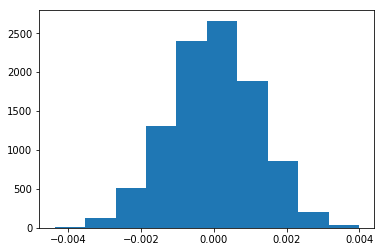

In [66]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [67]:
#distribution under the null
null_values = np.random.normal(0, p_diffs.std(), 10000)

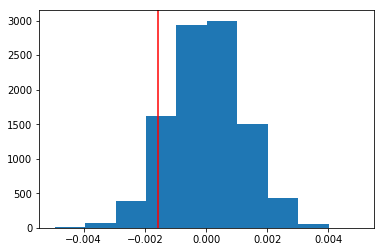

In [68]:
plt.hist(null_values)
plt.axvline(obs_diff, c='red')

In [69]:
# The p-value for a one-sided hypothesis test
# Reviewed and corrected as per reviewer comments
((null_values>obs_diff).mean())

0.91400000000000003

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The P-value represents the probability that there is a difference in p_new and p_old, assuming that the p_new and p_old are equal or p_old is greater than p_new.Since the P-value = 0.099, and it is greater than the defined error rate of 0.05, we fail to reject the null hypothesis. Thus, there is insufficient evidence to support the claim that there is a difference in p_new and p_old. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [70]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted==1').count()[0]
convert_new = df2.query('group == "treatment" & converted ==1').count()[0]

n_old = (df2[df2['landing_page']=='old_page']).count()[0]
n_new = (df2[df2['landing_page']=='new_page']).count()[0]

convert_old, convert_new, n_old, n_new

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [71]:
# find the z-score and the p-value of a two-sided hypothesis test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score of 1.31 also equates to a P-value of 0.095. The P-value of 0.095 indicates that we fail to reject the null hypothesis. That means, there is insufficient evidence to support the claim that p_new is less than p_old. 
<br>
The z test is a different approach to compute the P value.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression must be used because the response we need to simulate is a categorical value.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [72]:
# create an intercept column and fill it in with ones.
df['intercept'] = 1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [73]:
# perform logistic regression
logit_stats = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [74]:
results = logit_stats.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               7.093e-06
Time:                        23:54:03   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
treatment     -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

$H_{0} : P_{old} - P_{new }=0$

$H_{1} : P_{old} - P_{new}!=0$

The test in Part II was one sided while the current one is Two sided Test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

For a good regression model, we should include the variables that you are specifically testing along with other variables that affect the response in order to avoid biased results

Reference: http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-choose-the-best-regression-model

Disadvantages include ,  overfitting a regression model which occurs when you attempt to estimate too many parameters from a sample that is too small.

Reference: http://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [121]:
# join two dataframes: df2 and countries
countries_df = pd.read_csv('countries.csv')
df_ab_cntry = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [122]:
df_ab_cntry.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [123]:
df_ab_cntry.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [124]:
df_ab_cntry[['UK','US','CA']] = pd.get_dummies(df_ab_cntry['country'])

In [125]:
# Drop one column to get full rank
df_ab_cntry.drop(['UK'], axis=1, inplace=True)

In [126]:
df_ab_cntry.head()

,country,timestamp,group,landing_page,converted,US,CA
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [127]:
# perform logistic regression
df_ab_cntry['intercept'] = 1

logit_mod = sm.Logit(df_ab_cntry['converted'], df_ab_cntry[['intercept','US','CA']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [128]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        00:16:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [129]:
# reciprocals of the coeffiecients
1/np.exp(results.params)

intercept    7.671651
US           0.950546
CA           0.960018
dtype: float64

Since the p-values associated with the countries is more than 0.05 it does not appear that the country had an impact on conversion 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Incorporating reviewers comments:

Important For part III section h, the question state "Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country...", one way to implement that is to multiply the dummy variable created with each country (dummy variable) with the 'ab_page' dummy variable. For example,

joined_data['UK_ind_ab_page'] = joined_data['UK_ind']*joined_data['ab_page']
Then you can include these new variables in the model to appreciate if the contribution is significant.

In [150]:
df_ab_page = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_ab_page['intercept'] = 1
df_ab_page[['UK','US','CA']] = pd.get_dummies(df_ab_cntry['country'])
df_ab_page[['new', 'old']] = pd.get_dummies(df_ab_page['landing_page'])
df_ab_page[['ab_page', 'control']] = pd.get_dummies(df_ab_page['group'])

In [151]:
df_ab_page['UK_ind_ab_page'] = df_ab_page['UK']*df_ab_page['ab_page']
df_ab_page['US_ind_ab_page'] = df_ab_page['US']*df_ab_page['ab_page']
df_ab_page['CA_ind_ab_page'] = df_ab_page['CA']*df_ab_page['ab_page']

In [152]:
df_ab_page.head()

,country,timestamp,group,landing_page,converted,intercept,UK,US,CA,new,old,ab_page,control,UK_ind_ab_page,US_ind_ab_page,CA_ind_ab_page
user_id,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1,1,0,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0,0,0


In [153]:
df_ab_page.drop(['group','landing_page','old','control','UK','US','CA','ab_page','UK_ind_ab_page'], axis=1, inplace=True)

In [154]:
df_ab_page.reset_index().head()

,user_id,country,timestamp,converted,intercept,new,US_ind_ab_page,CA_ind_ab_page
0,834778,UK,2017-01-14 23:08:43.304998,0,1,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,0,1,1,0,0
2,822059,UK,2017-01-16 14:04:14.719771,1,1,1,0,0
3,711597,UK,2017-01-22 03:14:24.763511,0,1,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,0,1,1,0,0


In [157]:
logit_mod2 = sm.Logit(df_ab_cntry['converted'], df_ab_page[['intercept','US_ind_ab_page','CA_ind_ab_page']])
results2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [158]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:               9.383e-06
Time:                        00:23:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3685
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0038      0.008   -253.193      0.000      -2.019      -1.988
US_ind_ab_page     0.0116      0.018      0.643      0.520      -0.024       0.047
CA_ind_ab_page     0.0173      0.012      1.388      0.165      -0.007       0.042
==================================================================================
"""

In [159]:
1/np.exp(results2.params)

intercept         7.417021
US_ind_ab_page    0.988511
CA_ind_ab_page    0.982849
dtype: float64

It does not appear that there are significant effects on conversion based on the interaction between the page and the county of the user. 


<br> The summary above indicates that : <br> 
This indicates that both ab_page and country are statistically significant in predicting conversion rates
<br>
Users from USA are 0.950 times more likely to convert as compared to users from UK.
<br>
Users from Canada are 0.96 times more likely to convert as compared to users from UK.

<a id='conclusions'></a>
## Conclusions

The performance of the both the pages were mostly similar with the fact that : 
1. probability = 0.05 when comparing the conversion rates.
<br>
2. In the A/B test p_value was 0.094, suggesting that we failed to reject null hypothesis
<br>
3. In the logistic regression model we got similar results with a p value of  0.216, indicating a similar conclusion
<br>
4. The geographic location of the users was added as additional variables, but it seemed to have no impact on the conversion rate. <br>

Hence, We fail to reject the Null Hypothesis(H0) considering that the default fact that the old page is sufficient, should remain as it  is.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

## References

http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-choose-the-best-regression-model
<br>
https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe